In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.spatial.distance import pdist, squareform
from ripser import ripser
import matplotlib.pyplot as plt


# from lecturerer 
import stablerank.srank as sr


## Data Handling

In [2]:
# Load dataset
df = pd.read_csv('Cancer_Data.csv')

In [3]:
# Check data types of each column
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
# Check for missing values in each column
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Drop 'id' column
df = df.drop('id', axis=1)

In [6]:
# Map 'diagnosis' column to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1.0, 'B': 0.0})

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Data Exploration

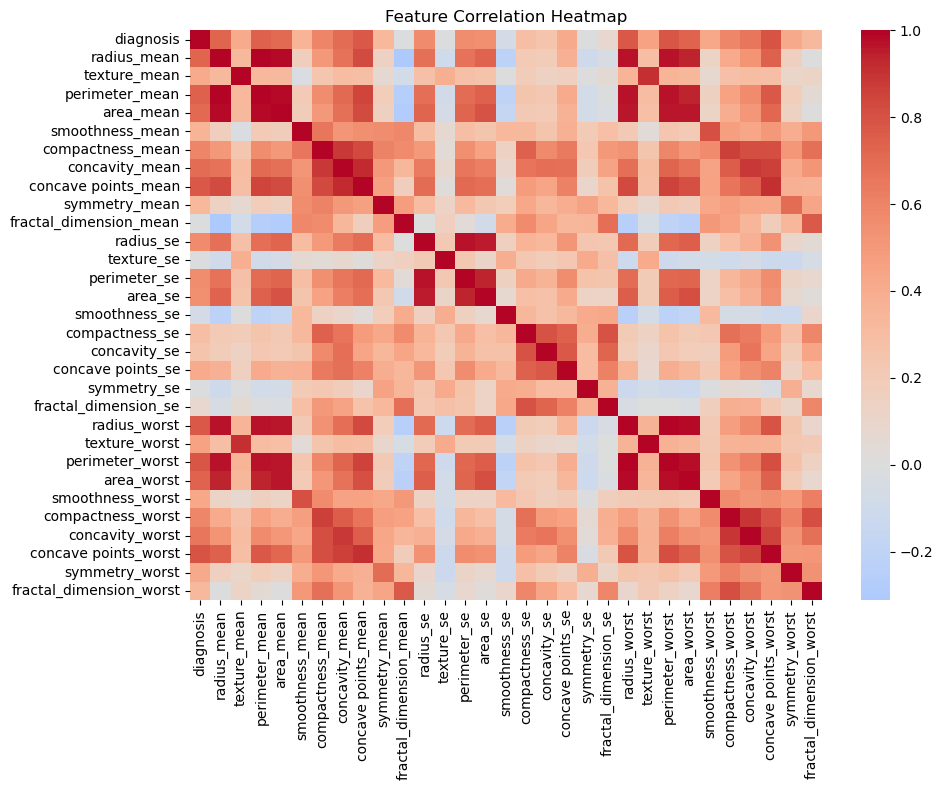

In [8]:
# Correlation between features
plt.figure(figsize=(10, 8))
correlation = df.corr()  # Drop id column
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


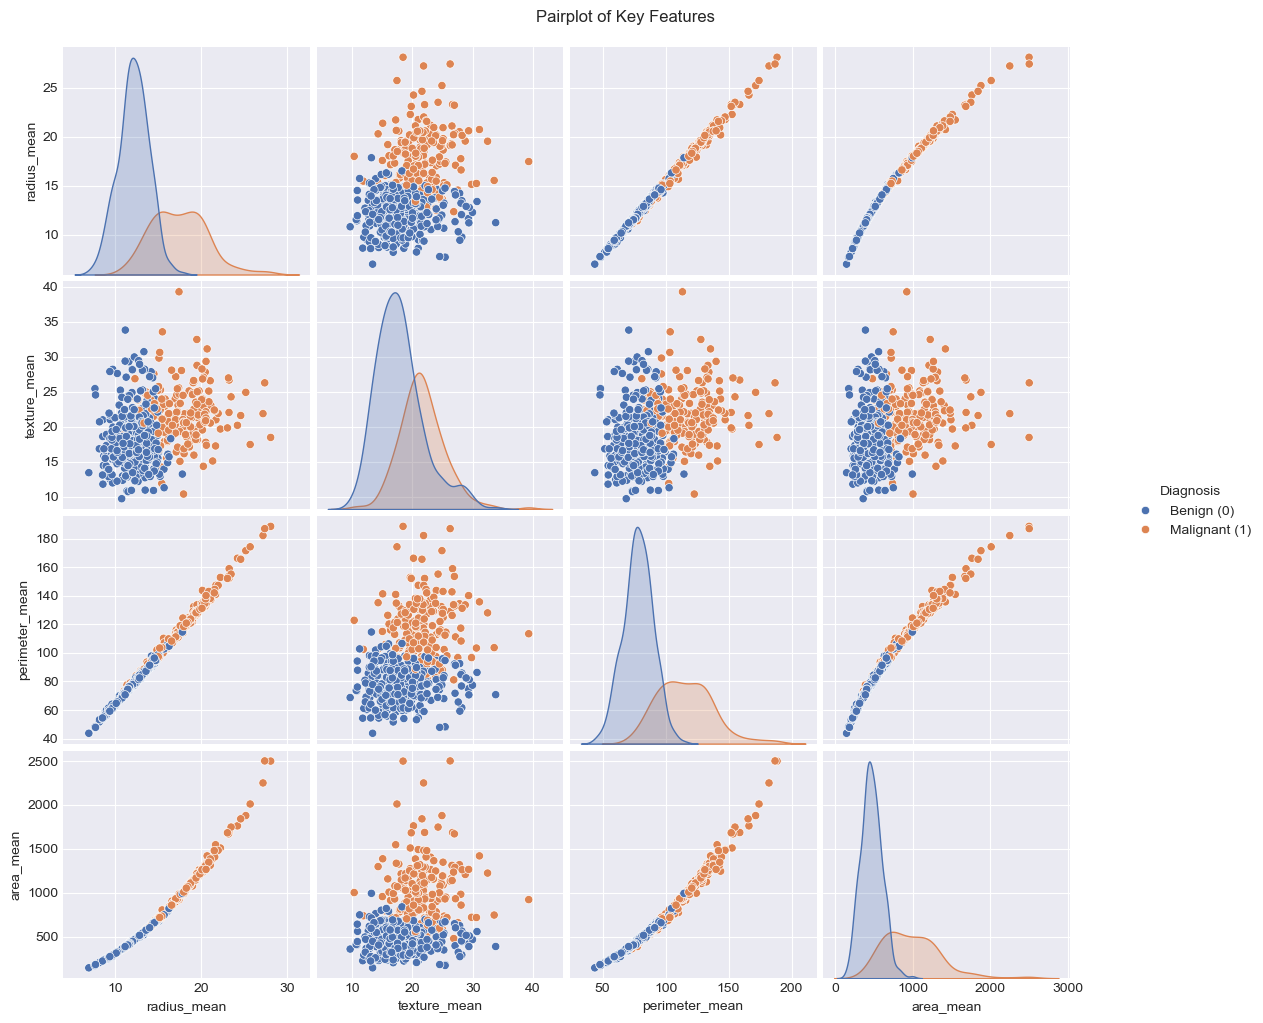

In [9]:
# Plot for key features
plt.style.use('seaborn-v0_8-darkgrid')

key_features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
g = sns.pairplot(df[key_features], hue='diagnosis', palette='deep', height=2.5, aspect=1.2)
g._legend.set_title('Diagnosis')
for t, l in zip(g._legend.texts, ['Benign (0)', 'Malignant (1)']):
    t.set_text(l)

plt.suptitle('Pairplot of Key Features', y=1.02)
plt.subplots_adjust(right=0.85)  # Make room for legend
plt.show()

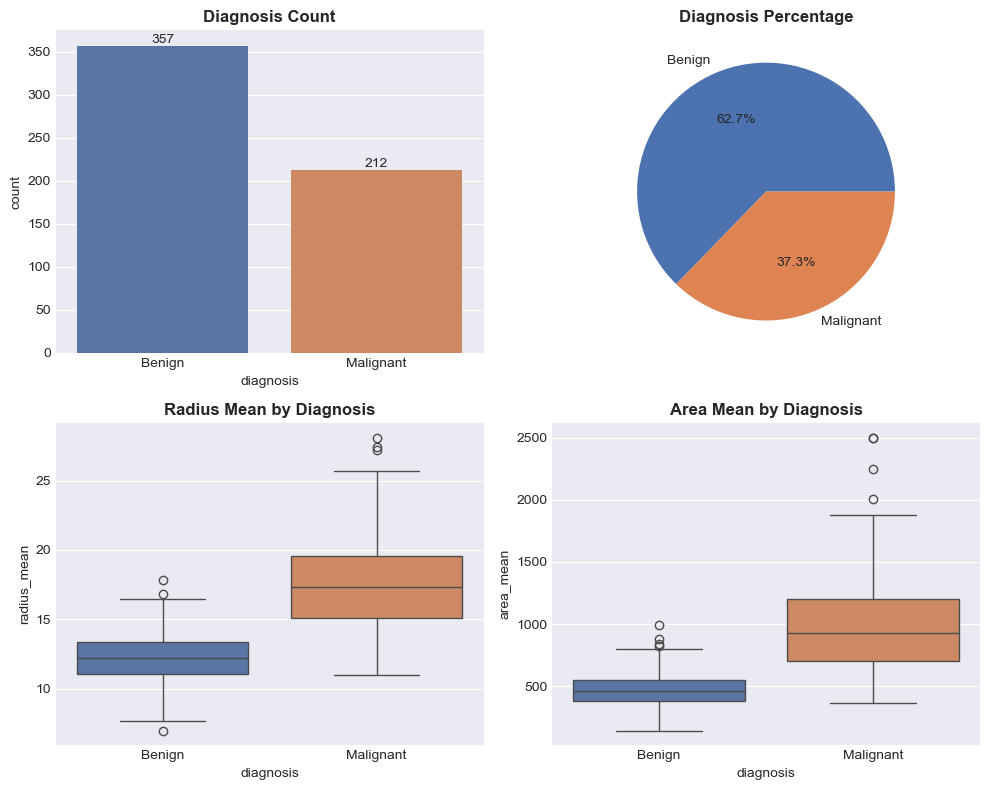

In [10]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Count plot
sns.countplot(data=df, x='diagnosis', palette='deep', ax=axes[0, 0])
axes[0, 0].set_title('Diagnosis Count', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('diagnosis')
axes[0, 0].set_xticklabels(['Benign', 'Malignant'])
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fontsize=10)

# 2. Pie chart
counts = df['diagnosis'].value_counts().sort_index()
deep_colors = sns.color_palette('deep', 2)
counts.plot(kind='pie', 
            labels=['Benign', 'Malignant'],
            autopct='%1.1f%%',
            colors=deep_colors,  # Fixed: use color_palette to get actual colors
            ax=axes[0, 1])
axes[0, 1].set_title('Diagnosis Percentage', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('')

# 3. Boxplot - radius_mean
sns.boxplot(data=df, x='diagnosis', y='radius_mean', palette='deep', ax=axes[1, 0])
axes[1, 0].set_title('Radius Mean by Diagnosis', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('diagnosis')
axes[1, 0].set_xticklabels(['Benign', 'Malignant'])  # Fixed: was axes[1, 1]

# 4. Boxplot - area_mean
sns.boxplot(data=df, x='diagnosis', y='area_mean', palette='deep', ax=axes[1, 1])
axes[1, 1].set_title('Area Mean by Diagnosis', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('diagnosis')
axes[1, 1].set_xticklabels(['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

## TDA

In [11]:
# Calculate z-scores
df_standardized = df.apply(stats.zscore)

In [12]:
#DETTTA KAN VI NOG TA BOPORT EFTERSOM VI HAR GJORT DET I RIPSER


# Calculate Euclidean distances
distances = pdist(df_standardized, metric='euclidean')

# Convert to square matrix
distance_matrix = squareform(distances)


In [13]:
# Compute Vietoris-Rips persistence
result = ripser(df_standardized, maxdim=2, metric='euclidean')

# Extract persistence diagrams
diagrams = result['dgms']


# KOLLA DESSA PRINTS OCH SKRIV OM!!!!!!!!!!
print(f"H0 (connected components): {len(diagrams[0])} features")
print(f"H1 (loops): {len(diagrams[1])} features")
print(f"H2 (voids): {len(diagrams[2])} features")

H0 (connected components): 569 features
H1 (loops): 412 features
H2 (voids): 173 features


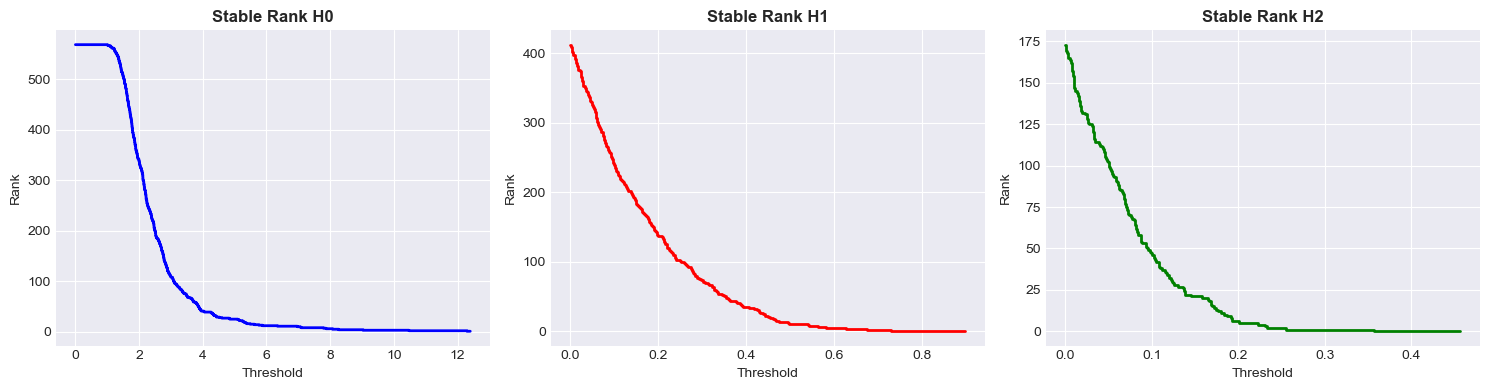

In [14]:
import stablerank.srank as sr
from ripser import ripser
import matplotlib.pyplot as plt
import numpy as np

# 1. Compute persistence
result = ripser(df_standardized, maxdim=2, metric='euclidean')
diagrams = result['dgms']

# 2. Convert to StableRank barcodes
barcodes = {
    'H0': sr.BC(diagrams[0]),
    'H1': sr.BC(diagrams[1]),
    'H2': sr.BC(diagrams[2])
}

# 3. Compute stable rank functions
sr_H0 = barcodes['H0'].stable_rank()
sr_H1 = barcodes['H1'].stable_rank()
sr_H2 = barcodes['H2'].stable_rank()

# 4. Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sr_H0.plot(ax=axes[0], color='blue', linewidth=2)
axes[0].set_title('Stable Rank H0', fontweight='bold')
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Rank')

sr_H1.plot(ax=axes[1], color='red', linewidth=2)
axes[1].set_title('Stable Rank H1', fontweight='bold')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Rank')

sr_H2.plot(ax=axes[2], color='green', linewidth=2)
axes[2].set_title('Stable Rank H2', fontweight='bold')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Rank')

plt.tight_layout()
plt.show()

### FÖRELÄSARENS SÄTT

In [17]:
err_distances=squareform(pdist(df, "euclidean"))

In [18]:
distance = sr.Distance(err_distances)

(array([371., 100.,  46.,  30.,   9.,   5.,   5.,   2.,   0.,   1.]),
 array([   0.        ,  409.0499004 ,  818.0998008 , 1227.1497012 ,
        1636.19960161, 2045.24950201, 2454.29940241, 2863.34930281,
        3272.39920321, 3681.44910361, 4090.49900402]),
 <BarContainer object of 10 artists>)

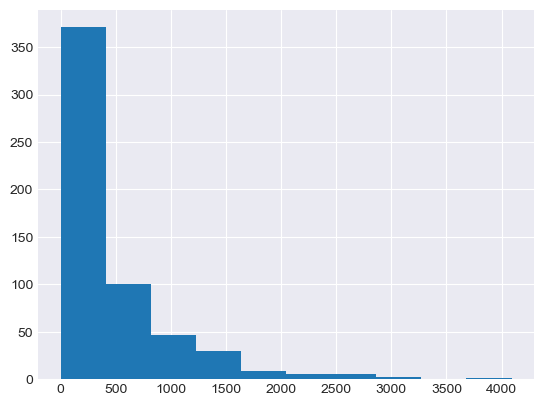

In [22]:
plt.hist(err_distances[5])


In [ ]:
for i in range(number_data_points):
    plt.hist(wisconsin_distances[i])
